# Introduction
![](https://i.milliyet.com.tr/MolatikDetayBig/2020/04/14/fft371_mf33115214.Jpeg)

## Dataset Information

##### Survived: Survivors on Titanic ship 1, survivors 0
##### PassengerId: Passengers id
##### Pclass: Economic status : 1st = Upper 2nd = Middle 3rd = Lower
##### Name:  Passengers names
##### Sex: Male / Female
##### Age: Ages of Passengers
##### SlipSp: brother / sister (1 or 0)
##### Parch: parent / child (1 or 0)
##### Ticket: Ticket numbers 
##### Fare: Ticket price
##### Cabin: Cabin number
##### Embarked:  Port names (C, Q, S) C = Cherbourg, Q = Queenstown, S = Southampton

##### Survived = TARGET VALUE



## Content

### 1-Load and Check Data
### 2-Target Visualization
### 3-Feature Extraction
### 4-Extracting unnecessary attributes
### 5-Missing Value Control
### 6-Variable Transformation
### 7-Outlier Data Control


In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno
from matplotlib import pyplot as plt
from sklearn import preprocessing 
import re
from warnings import filterwarnings
filterwarnings('ignore')

## 1) Load Data

In [76]:
df=pd.read_csv("Data/train.csv", sep=",")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
df.shape

(891, 12)

In [78]:
df.ndim

2

In [79]:
df.size

10692

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [82]:
corr = df.corr() #We look at the correlation to see the relationship between the attributes
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


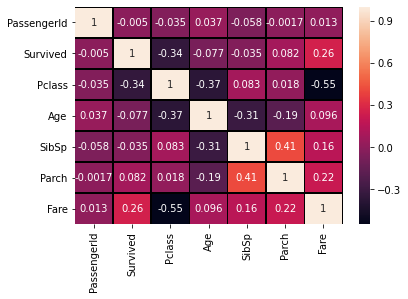

In [83]:
sns.heatmap(corr,annot=True,linecolor="black",lw=0.5) 

In [84]:
e = df["Embarked"].copy() 
e.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [85]:
e.replace("C","Cherbourg", inplace = True)
e.replace("S","Southampton", inplace = True)
e.replace("Q","Queenstown", inplace = True)
#Since I wanted to do data visualization later with Tableau, I wanted to complete the names of the cities.

In [86]:
df["Embarked"] = e
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


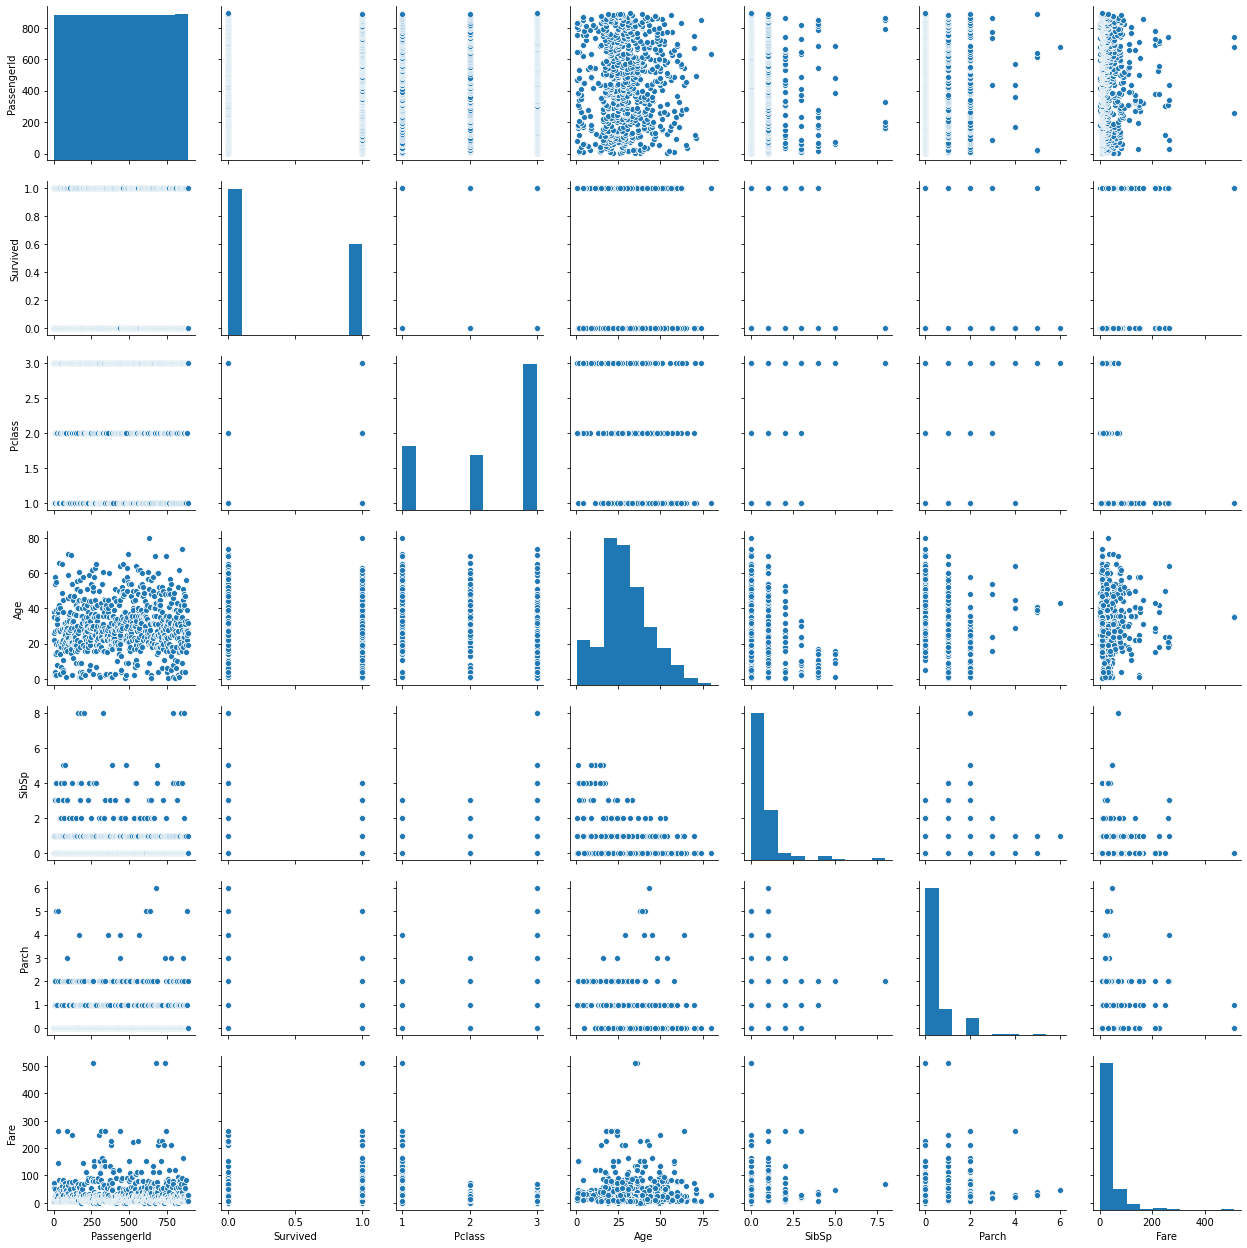

In [87]:
sns.pairplot(df);

## 2) Target Visualization

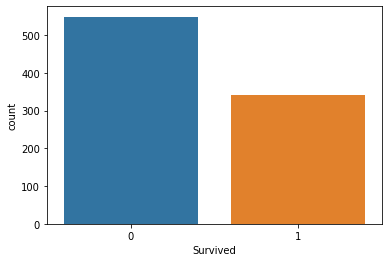

In [88]:
sns.countplot(df["Survived"]) 

In [89]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 3) Feature Extraction

In [90]:
#The name variable has a degree value. The name of the person is not important to us. We can create a new attribute named title.

In [91]:
def degree(Name):
    Name = re.sub(".*,.([^.]*)\\..*","\\1",Name)
    return Name

In [92]:
degree("Graham, Miss. Margaret Edith")

'Miss'

In [93]:
degree = df["Name"].apply(degree)
degree

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [94]:
df["Degree"] = degree #we created new attribute

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Degree
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr


In [96]:
df["Degree"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [97]:
for i,j in enumerate(degree):
    
    if j== "Mme":
        degree[i] = "Mrs"
    elif j == "Mlle" or j == "Ms":
        degree[i] = "Miss"
    elif j == "Major" or j == "Dr" or j == "Capt" or j == "Col" or j == "Rev":
        degree[i] = "Ranked"
    elif j == "Lady" or j == "Dona" or j == "the Countess" or j == "Don" or j == "Sir" or j == "Jonkheer" :
        degree[i] = "Royalty"

In [98]:
#Some degrees are of the same importance, so we added them to the same category.

In [99]:
df["Degree"] = degree
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Degree
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr


In [100]:
df["Degree"].unique() #our degrees

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Ranked'], dtype=object)

## 4) Extracting unnecessary attributes

In [101]:
#When creating a model, we removed the qualities that were not important to us

In [102]:
df.drop(["Name","PassengerId","Ticket"], axis =1, inplace = True)

In [103]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Degree
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,Mr
1,1,1,female,38.0,1,0,71.2833,C85,Cherbourg,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,Miss
3,1,1,female,35.0,1,0,53.1000,C123,Southampton,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,Mr


## 5) Missing Value Control

In [104]:
df.isnull().values.any()

True

In [105]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Degree        0
dtype: int64

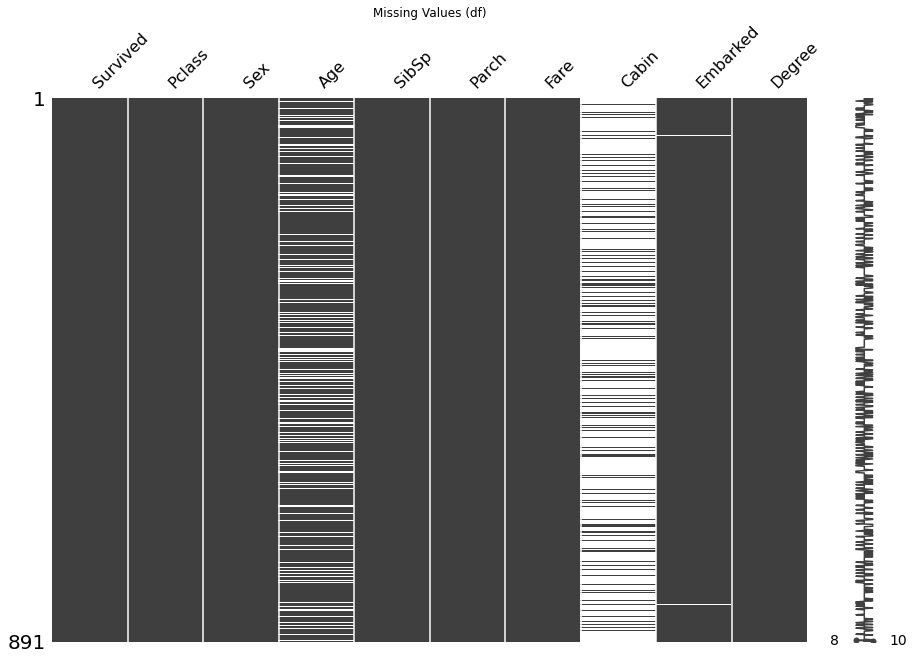

In [106]:
missingno.matrix(df, figsize = (15,10))
plt.title("Missing Values (df)")
plt.show()

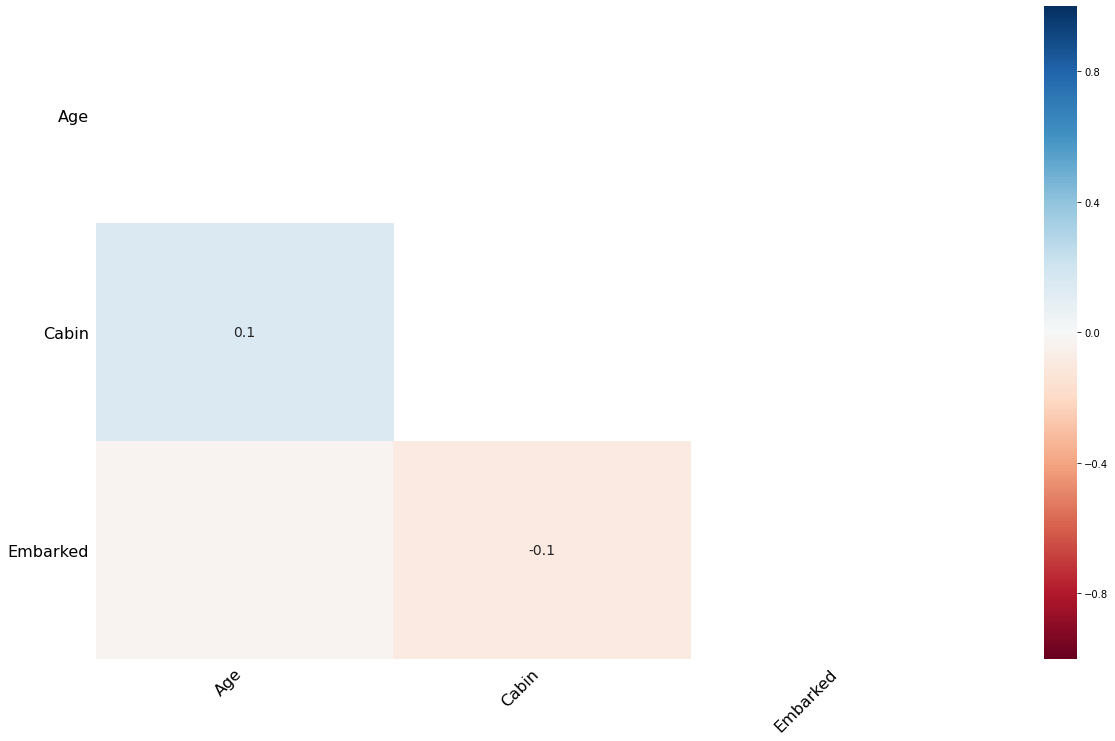

In [107]:
missingno.heatmap(df,(15,5))

In [108]:
def missing_value_table(df):
    missing_value = df.isnull().sum()
    missing_value_percent = 100 * df.isnull().sum() / len(df)
    missing_value_table = pd.concat([missing_value,missing_value_percent], axis = 1)
    missing_value_table_end = missing_value_table.rename(columns = {0 : 'Missing Value', 1 : '% değeri'})
    return missing_value_table_end

In [109]:
missing_value_table(df)

,Missing Value,% değeri
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Cabin,687,77.104377
Embarked,2,0.224467
Degree,0,0.000000


#### We have filled the embedded attribute with the most repetitive value since it has little missing value

In [110]:
df[df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Degree
61,1,1,female,38.0,0,0,80.0,B28,NaN,Miss
829,1,1,female,62.0,0,0,80.0,B28,NaN,Mrs


In [111]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["Embarked"] = imp_mean.fit_transform(df[["Embarked"]])

In [112]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Degree        0
dtype: int64

#### We want to estimate and fill the missing values with age in KNN

In [113]:
df[df["Age"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Degree
5,0,3,male,NaN,0,0,8.4583,NaN,Queenstown,Mr
17,1,2,male,NaN,0,0,13.0000,NaN,Southampton,Mr
19,1,3,female,NaN,0,0,7.2250,NaN,Cherbourg,Mrs
26,0,3,male,NaN,0,0,7.2250,NaN,Cherbourg,Mr
28,1,3,female,NaN,0,0,7.8792,NaN,Queenstown,Miss
...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,NaN,Cherbourg,Mr
863,0,3,female,NaN,8,2,69.5500,NaN,Southampton,Miss
868,0,3,male,NaN,0,0,9.5000,NaN,Southampton,Mr
878,0,3,male,NaN,0,0,7.8958,NaN,Southampton,Mr


In [114]:
from sklearn.impute import KNNImputer
df_numeric = df.select_dtypes(include = ["float64","int64"])
var_names = df_numeric.columns
n_df = np.array(df_numeric)

In [115]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [116]:
imputer = KNNImputer(n_neighbors=4)
new_data = imputer.fit_transform(n_df)
df2=pd.DataFrame(new_data, columns=var_names)
df[["Age"]] = df2.Age

In [117]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
Degree        0
dtype: int64

#### Since the cabin attribute contains more than 77% missing value, we subtract the cabin attribute from the dataset.

In [118]:
df[df["Cabin"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Degree
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,Mr
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,Miss
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,Mr
5,0,3,male,26.0,0,0,8.4583,NaN,Queenstown,Mr
7,0,3,male,2.0,3,1,21.0750,NaN,Southampton,Master
...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,NaN,Southampton,Mr
885,0,3,female,39.0,0,5,29.1250,NaN,Queenstown,Mrs
886,0,2,male,27.0,0,0,13.0000,NaN,Southampton,Ranked
888,0,3,female,20.0,1,2,23.4500,NaN,Southampton,Miss


In [119]:
df.drop(["Cabin"], axis =1, inplace = True)

In [120]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Degree
0,0,3,male,22.0,1,0,7.2500,Southampton,Mr
1,1,1,female,38.0,1,0,71.2833,Cherbourg,Mrs
2,1,3,female,26.0,0,0,7.9250,Southampton,Miss
3,1,1,female,35.0,1,0,53.1000,Southampton,Mrs
4,0,3,male,35.0,0,0,8.0500,Southampton,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,Ranked
887,1,1,female,19.0,0,0,30.0000,Southampton,Miss
888,0,3,female,20.0,1,2,23.4500,Southampton,Miss
889,1,1,male,26.0,0,0,30.0000,Cherbourg,Mr


## 6)Variable Transformation

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Degree      891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [122]:
df["Sex"].unique() #we can apply 0-1 transformation

array(['male', 'female'], dtype=object)

In [123]:
df["Embarked"].unique() #we should apply one-hot transformation

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [124]:
df["Degree"].unique() #we should apply one-hot transformation

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Ranked'], dtype=object)

# 0-1 Transformation

In [125]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df["Sex"] = lbe.fit_transform(df["Sex"])

In [126]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Degree
0,0,3,1,22.0,1,0,7.2500,Southampton,Mr
1,1,1,0,38.0,1,0,71.2833,Cherbourg,Mrs
2,1,3,0,26.0,0,0,7.9250,Southampton,Miss
3,1,1,0,35.0,1,0,53.1000,Southampton,Mrs
4,0,3,1,35.0,0,0,8.0500,Southampton,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Southampton,Ranked
887,1,1,0,19.0,0,0,30.0000,Southampton,Miss
888,0,3,0,20.0,1,2,23.4500,Southampton,Miss
889,1,1,1,26.0,0,0,30.0000,Cherbourg,Mr


# One Hot Transformation

In [127]:
clmns = ['Embarked','Degree']
df = pd.concat([df, pd.get_dummies(df[clmns])], axis=1).drop(clmns, axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Degree_Master,Degree_Miss,Degree_Mr,Degree_Mrs,Degree_Ranked,Degree_Royalty
0,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1,0,0,0,0,1,0
887,1,1,0,19.0,0,0,30.0000,0,0,1,0,1,0,0,0,0
888,0,3,0,20.0,1,2,23.4500,0,0,1,0,1,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,1,0,0,0,0,1,0,0,0


## 7)Outlier Data Control

In [128]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton',
       'Degree_Master', 'Degree_Miss', 'Degree_Mr', 'Degree_Mrs',
       'Degree_Ranked', 'Degree_Royalty'],
      dtype='object')

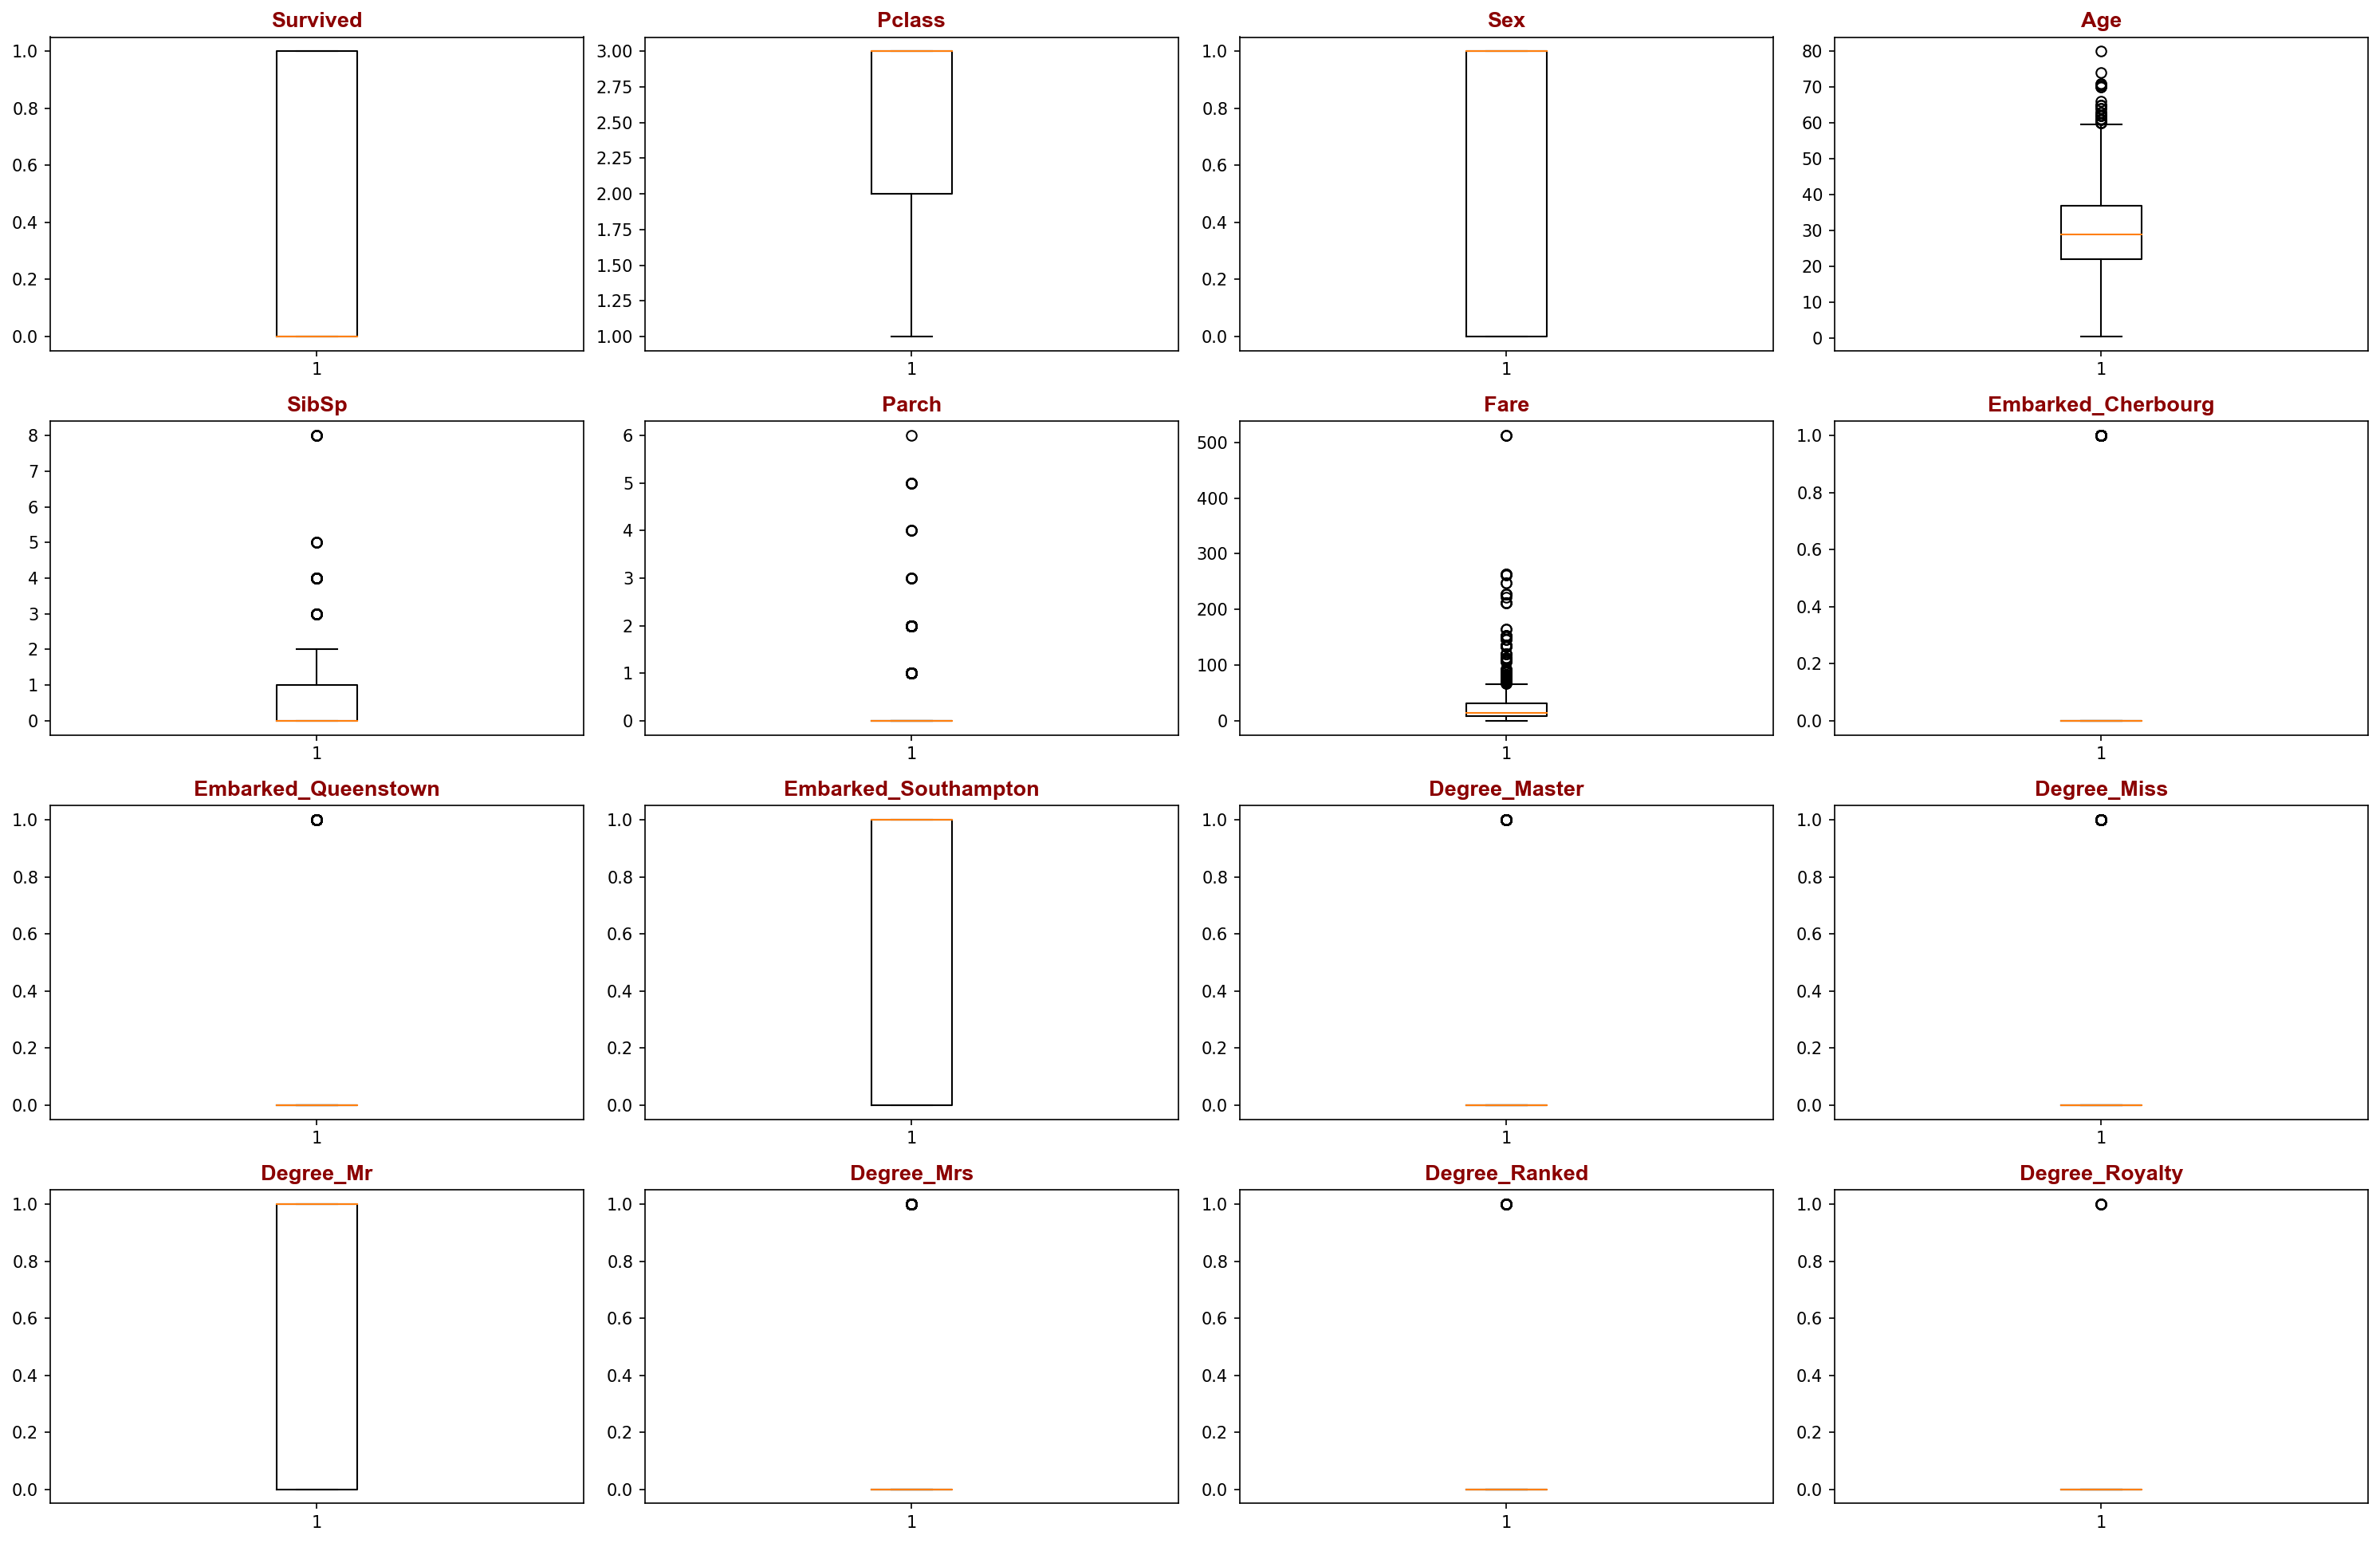

In [129]:
import matplotlib.pyplot as plt
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,13),dpi=150)
fill_list=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton',
       'Degree_Master', 'Degree_Miss', 'Degree_Mr', 'Degree_Mrs',
       'Degree_Ranked', 'Degree_Royalty']
for i,col in enumerate(fill_list):
    plt.subplot(4,4,i+1)
    plt.boxplot(col, data=df)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()
#Let's visualize outlier data

In [130]:
c = ['Age','SibSp','Parch','Fare','Embarked_Cherbourg','Embarked_Queenstown','Degree_Master','Degree_Miss','Degree_Mrs','Degree_Ranked','Degree_Royalty']
for col in c :
    df_col = df[col]
    Q1 = df_col.quantile(0.25) #first interquartile range
    Q3 = df_col.quantile(0.75) #third interquartile range
    IQR = Q3-Q1   #IQR tells how far the middle values spread.And this is its formula
    low_limit = Q1 - 1.5*IQR #low limit formula
    high_limit = Q3 + 1.5*IQR #high limit formula
    outliers_col_higher = (df_col > high_limit) #outlier data greater than the upper limit
    df_col[outliers_col_higher] = high_limit 

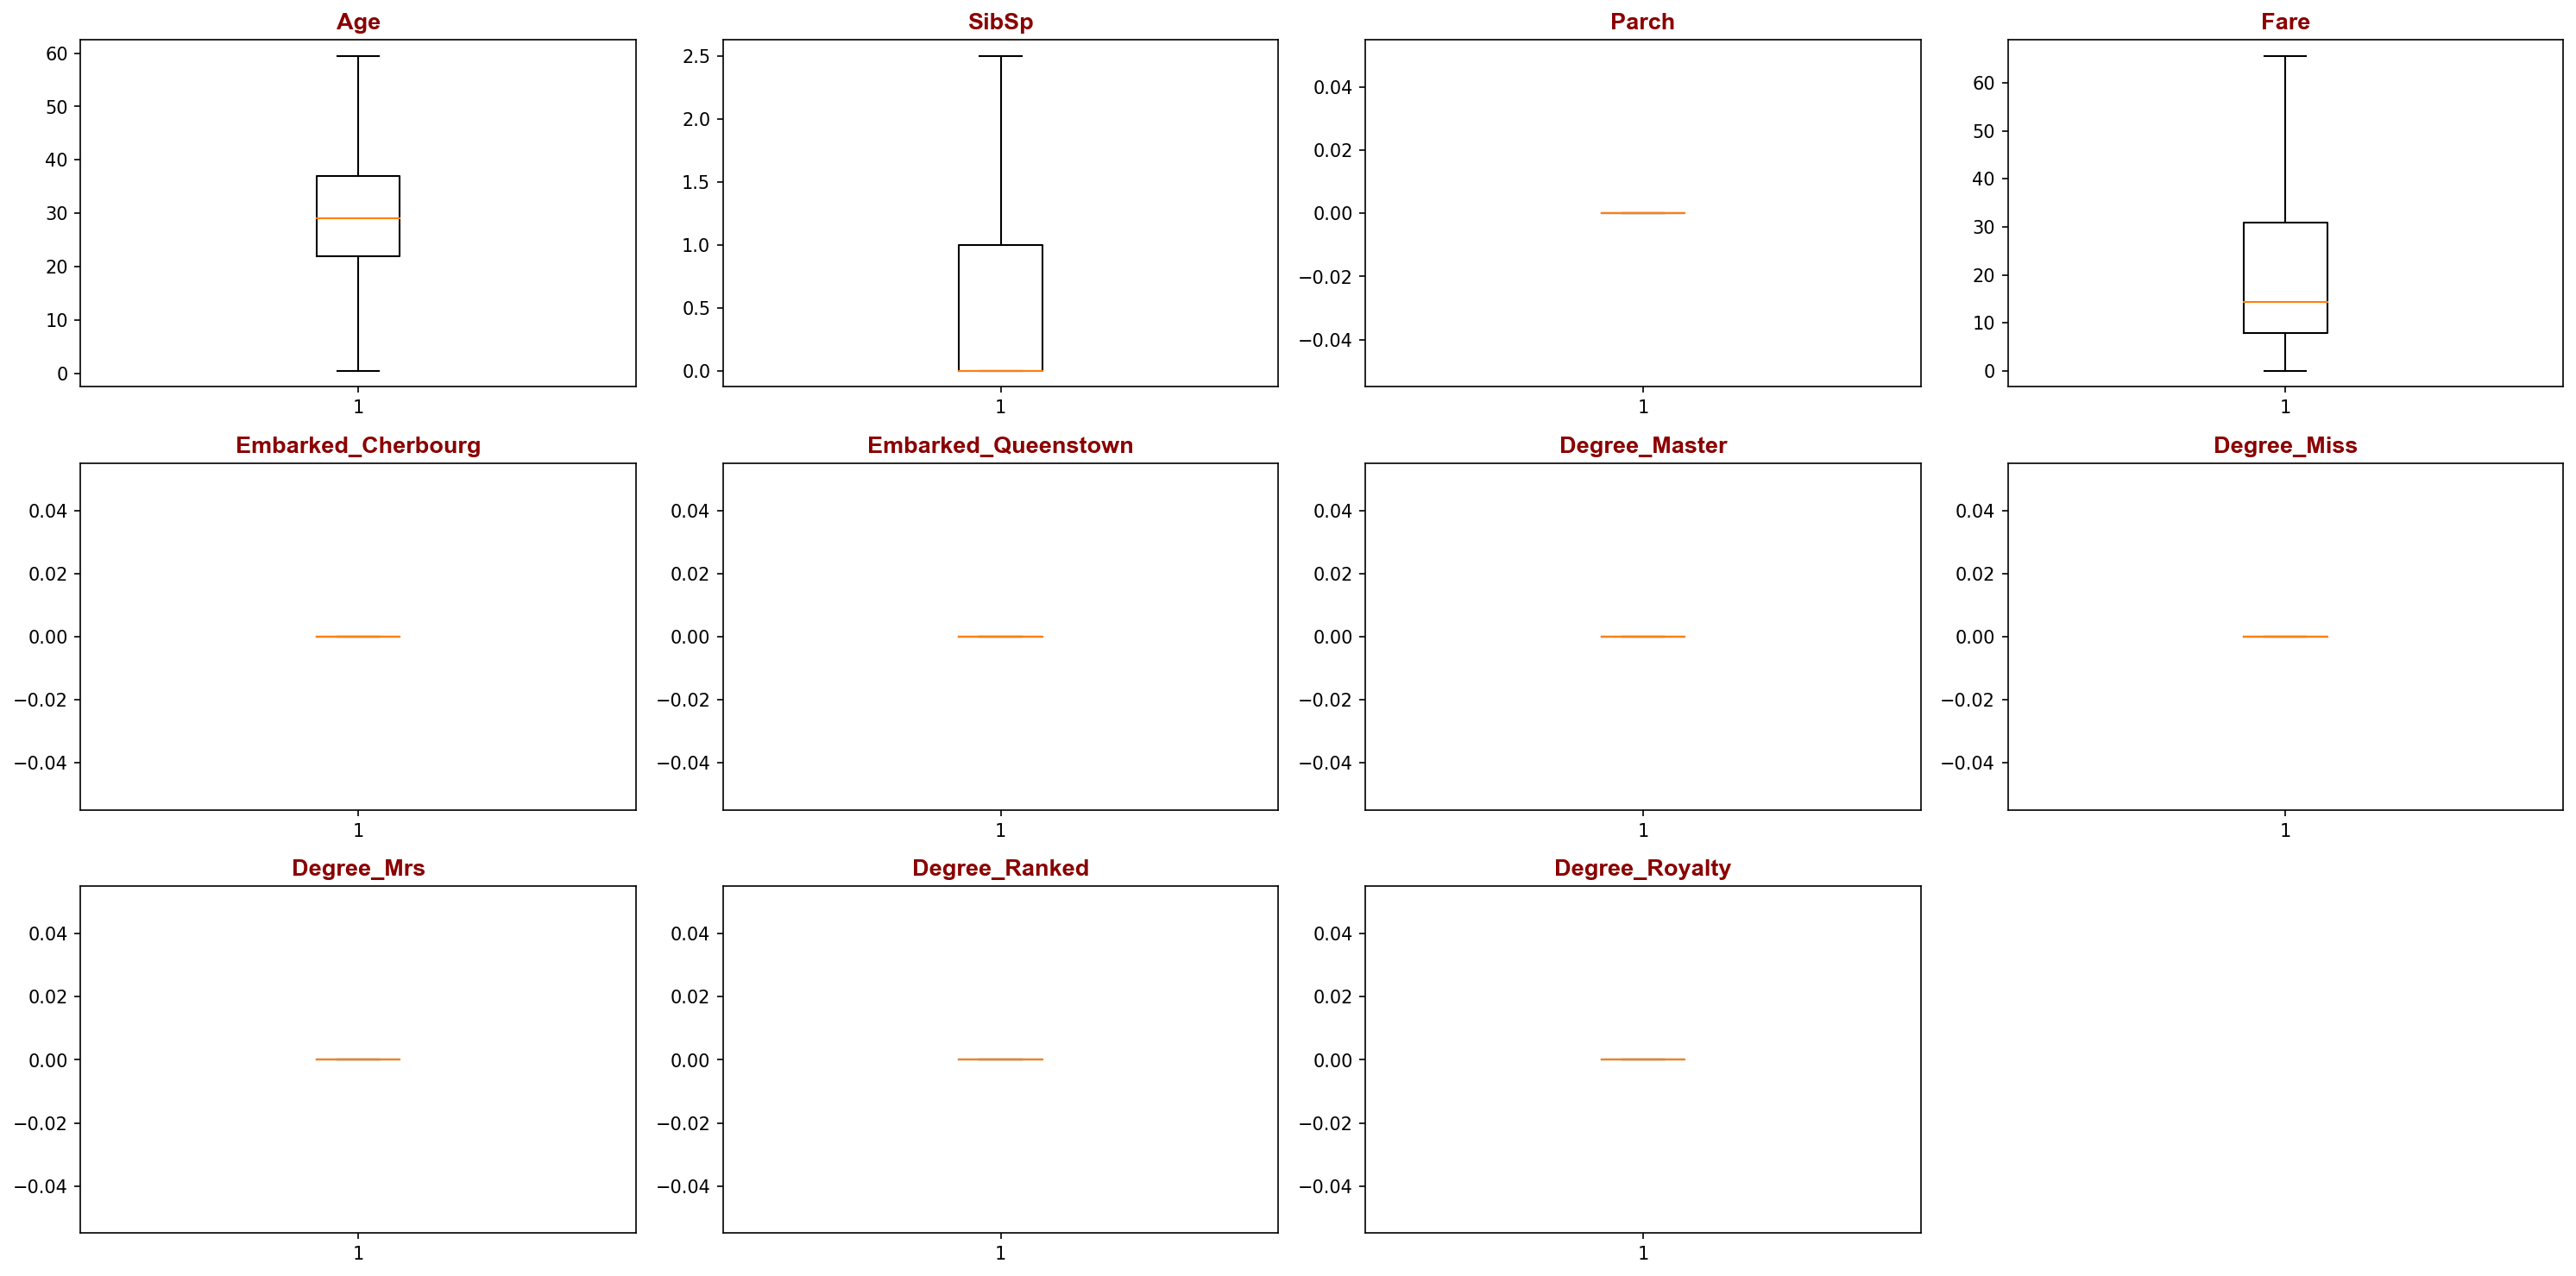

In [74]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,13),dpi=150)
for i,col in enumerate(c):
    plt.subplot(4,4,i+1)
    plt.boxplot(col, data=df)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()
#let's visualize new data